#### sklearn.metrics.confusion_matrix

- sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

- parameters
    - y_true
    - y_pred
    - labels

- return
    - ndarray of shape

#### sklearn.metrics.precision_score

- sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

- parameters
    - y_true
    - y_pred
    - labels
    - pos_label : default=1,  The class to report if average='binary' and the data is binary
    - zero_division : Sets the value to return when there is a zero division. If set to “warn”, this acts as 0, but warnings are also raised.

- returns
    - precision : float

#### sklearn.metrics.recall_score
* sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

* parameter 
    - y_true
    - y_pred
    - labels
    - pos_label
    
* return
    - recall

In [9]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score ,accuracy_score
import numpy as np

y_test = list(np.zeros(405))+list(np.ones(45))
fakepred = list(np.zeros(420))+list(np.ones(30))

print(confusion_matrix(y_test,fakepred))
print(f'정확도: {accuracy_score(y_test,fakepred)}')
print(f'정밀도: {precision_score(y_test,fakepred)}')
print(f'재현율: {recall_score(y_test,fakepred)}')

[[405   0]
 [ 15  30]]
정확도: 0.9666666666666667
정밀도: 1.0
재현율: 0.6666666666666666


### precision_recall_curve()

In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

train_df = pd.read_csv("./datasets/titanic_train.csv")
test_df = pd.read_csv("./datasets/titanic_test.csv")
y_test = pd.read_csv('./datasets/titanic_test_y.csv')
y_test = y_test['Survived']


# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

train_df = transform_features(train_df)
test_df = transform_features(test_df)

# label,feature
x_train = train_df.drop("Survived",axis=1)
y_train = train_df['Survived']
x_test = test_df

## logistic regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
pred_proba = lr.predict_proba(x_test)
print(pred_proba[:3])
print(pred[:3])

[[0.90004657 0.09995343]
 [0.56777228 0.43222772]
 [0.89778678 0.10221322]]
[0 0 0]


#### Binarizer  임계값 설정


In [59]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, f1_score

# Binarizer 의 threshold 설정값, 분류 결정 임계값임
# threshold 기준값보다 같거나 작으면 0을 크면 1을 반환
custom_threshold = 0.5

# predict_proba() 반환값의 두번째 컬럼 , 즉 positive클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)


def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('confusion matrix')
    print(confusion)
    print(f'정확도: {np.round(accuracy,4)},정밀도{np.round(precision,4)}, 재현율{np.round(recall,4)}, f1_Score{np.round(f1,4)}')
    
get_clf_eval(y_test,custom_predict)

confusion matrix
[[245  21]
 [  2 150]]
정확도: 0.945,정밀도0.8772, 재현율0.9868, f1_Score0.9288


### 임계값 찾기 for 구문

In [60]:
import numpy as np
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix

threshold_arr = np.linspace(0,1,num=20,endpoint=False)

def get_clf_eval(y_test,pred):
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    return (precision,recall)


In [39]:
precision_list = []
recall_list = []

for i in threshold_arr:
    # threshold 객체내의 값을 차례로 iteration하면서 evaluation 실행
    binarizer = Binarizer(threshold=i).fit(pred_proba[:,1].reshape(-1,1))
    custom_predict = binarizer.transform(pred_proba[:,1].reshape(-1,1))
    precision,recall =  get_clf_eval(y_test,custom_predict)
    precision_list.append(precision)
    recall_list.append(recall)
print(precision_list)
print(recall_list)

[0.36363636363636365, 0.3645083932853717, 0.40970350404312667, 0.5314685314685315, 0.5846153846153846, 0.6523605150214592, 0.7203791469194313, 0.7524752475247525, 0.7794871794871795, 0.8379888268156425, 0.8771929824561403, 0.9177215189873418, 0.9416058394160584, 0.9805825242718447, 0.978021978021978, 0.9880952380952381, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9868421052631579, 0.9868421052631579, 0.9539473684210527, 0.8486842105263158, 0.6644736842105263, 0.5855263157894737, 0.5460526315789473, 0.4407894736842105, 0.32894736842105265, 0.19736842105263158, 0.05263157894736842]


#### sklearn.metrics.precision_recall_curve
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)

* parameters
    - y_true
    - probas_pred
* returns
    - precision
    - recall
    - thresholds

In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)

# label이 1인 값의 두번째 열만 사용
pred_proba = lr_clf.predict_proba(x_test)[:,1]

precisions, recalls,thresholds = precision_recall_curve(y_test,pred_proba)
print('threshold 5 sample',thresholds[:5])
print('precision 5 sample',precisions[:5])
print('recall 5 sample',recalls[:5])

threshold 5 sample [0.03812389 0.05315255 0.06611711 0.07033047 0.07142196]
precision 5 sample [0.36363636 0.36450839 0.36538462 0.36626506 0.36714976]
recall 5 sample [1. 1. 1. 1. 1.]


#### precision_recall_curve 그래프 trade off

*  matplotlib.pyplot.xticks(ticks=None, labels=None, *, minor=False, **kwargs)
    - parameter 
        - ticks :The list of xtick locations. Passing an empty list removes all xticks.
        - labels :The labels to place at the given ticks locations. This argument can only be passed if ticks is passed as well.
        
* matplotlib.pyplot.xlim(*args, **kwargs)
    - ex)
        - left, right = xlim()  # return the current xlim
        - xlim(left, right)     # set the xlim to left, right
                

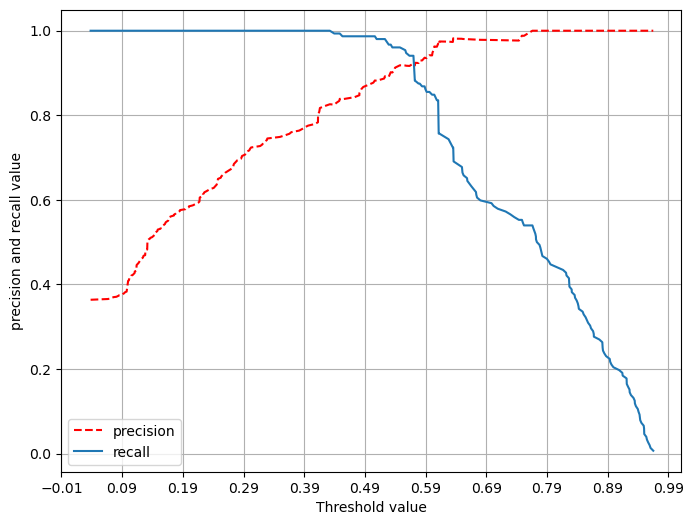

In [49]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test,pred_proba):
    precisions, recalls,thresholds = precision_recall_curve(y_test,pred_proba)
    
    plt.figure(figsize=(8,6))
    threshold_index = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_index],'r--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_index],label='recall')
    
    start,end = plt.xlim()
    plt.xticks(np.around(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('precision and recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,pred_proba)